# 1)	Importing necessary libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16

In [2]:
import warnings
import itertools
warnings.filterwarnings("ignore")

# 2)	Time series dataset retrieving and visualization

In [3]:
data = pd.read_csv('data/MER_T12_06.csv')
data.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


In [5]:
dataparse = lambda x : pd.to_datetime(x, format = '%Y%m', errors = 'coerce')
data = pd.read_csv('data/MER_T12_06.csv', parse_dates = ['YYYYMM'], date_parser = dataparse)
data.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,1973-01-01,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,1973-02-01,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,1973-03-01,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,1973-04-01,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,1973-05-01,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [6]:
data.tail(15)

,MSN,YYYYMM,Value,Column_Order,Description,Unit
5079,TXEIEUS,2015-06-01,177.799,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5080,TXEIEUS,2015-07-01,201.06,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5081,TXEIEUS,2015-08-01,194.735,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5082,TXEIEUS,2015-09-01,170.79,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5083,TXEIEUS,2015-10-01,144.693,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5084,TXEIEUS,2015-11-01,133.131,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5085,TXEIEUS,2015-12-01,136.421,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5086,TXEIEUS,NaT,1918.544,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5087,TXEIEUS,2016-01-01,159.03,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5088,TXEIEUS,2016-02-01,133.106,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [7]:
data.Column_Order.value_counts()

Column_Order
1    566
2    566
3    566
4    566
5    566
6    566
7    566
8    566
9    566
Name: count, dtype: int64

In [8]:
data.Unit.value_counts()

Unit
Million Metric Tons of Carbon Dioxide    5094
Name: count, dtype: int64

In [9]:
data.Description.value_counts() # 9values

Description
Coal Electric Power Sector CO2 Emissions                                                      566
Natural Gas Electric Power Sector CO2 Emissions                                               566
Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions    566
Petroleum Coke Electric Power Sector CO2 Emissions                                            566
Residual Fuel Oil Electric Power Sector CO2 Emissions                                         566
Petroleum Electric Power Sector CO2 Emissions                                                 566
Geothermal Energy Electric Power Sector CO2 Emissions                                         566
Non-Biomass Waste Electric Power Sector CO2 Emissions                                         566
Total Energy Electric Power Sector CO2 Emissions                                              566
Name: count, dtype: int64

In [10]:
data.MSN.value_counts()

MSN
CLEIEUS    566
NNEIEUS    566
DKEIEUS    566
PCEIEUS    566
RFEIEUS    566
PAEIEUS    566
GEEIEUS    566
NWEIEUS    566
TXEIEUS    566
Name: count, dtype: int64

In [11]:
ts = data[pd.Series(pd.to_datetime(data.index, errors='coerce')).notnull().values]
ts.head(15)

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,1973-01-01,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,1973-02-01,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,1973-03-01,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,1973-04-01,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,1973-05-01,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5,CLEIEUS,1973-06-01,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
6,CLEIEUS,1973-07-01,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
7,CLEIEUS,1973-08-01,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
8,CLEIEUS,1973-09-01,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
9,CLEIEUS,1973-10-01,67.668,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [12]:
ts.dtypes

MSN                     object
YYYYMM          datetime64[ns]
Value                   object
Column_Order             int64
Description             object
Unit                    object
dtype: object

In [13]:
ts['Value'] = pd.to_numeric(ts['Value'], errors = 'coerce')
ts.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,1973-01-01,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,1973-02-01,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,1973-03-01,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,1973-04-01,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,1973-05-01,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [14]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   MSN           5094 non-null   object        
 1   YYYYMM        4707 non-null   datetime64[ns]
 2   Value         4678 non-null   float64       
 3   Column_Order  5094 non-null   int64         
 4   Description   5094 non-null   object        
 5   Unit          5094 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 238.9+ KB


In [15]:
ts.dtypes

MSN                     object
YYYYMM          datetime64[ns]
Value                  float64
Column_Order             int64
Description             object
Unit                    object
dtype: object

In [16]:
ts.dropna(inplace = True)

## 4.2	Time series dataset visualization

The dataset has 8 energy sources of CO2 emission. In the following cell, we will group the CO2 Emission dataset based on the type of energy source.

In [17]:
Energy_sources = ts.groupby('Description')
Energy_sources.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,1973-01-01,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,1973-02-01,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,1973-03-01,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,1973-04-01,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,1973-05-01,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
566,NNEIEUS,1973-01-01,12.175,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
567,NNEIEUS,1973-02-01,11.708,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
568,NNEIEUS,1973-03-01,13.994,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
569,NNEIEUS,1973-04-01,14.627,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
570,NNEIEUS,1973-05-01,17.344,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


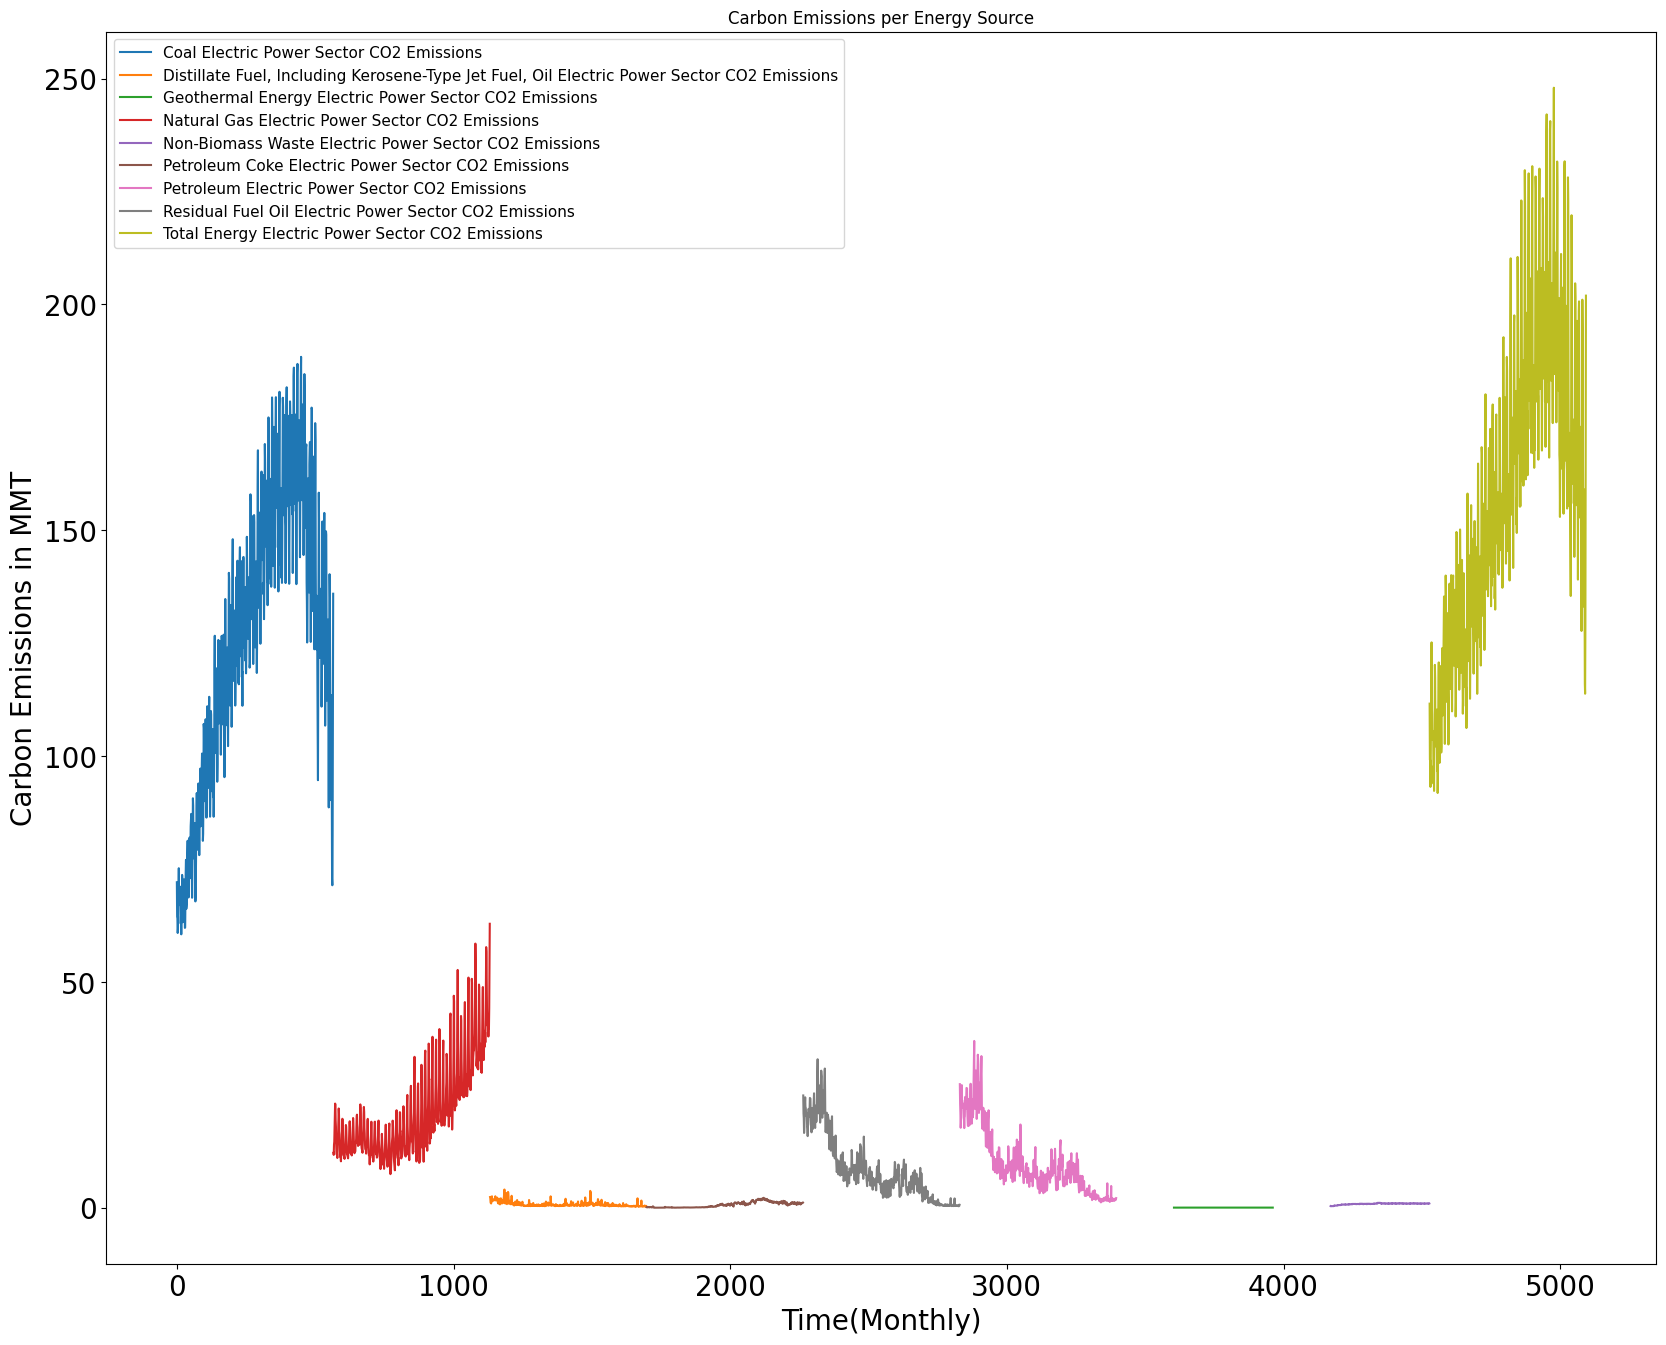

In [18]:
fig, ax = plt.subplots()
for desc, group in Energy_sources:
    group.plot(y='Value', label=desc,ax = ax, title='Carbon Emissions per Energy Source', fontsize = 20)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 11)

plt.show()

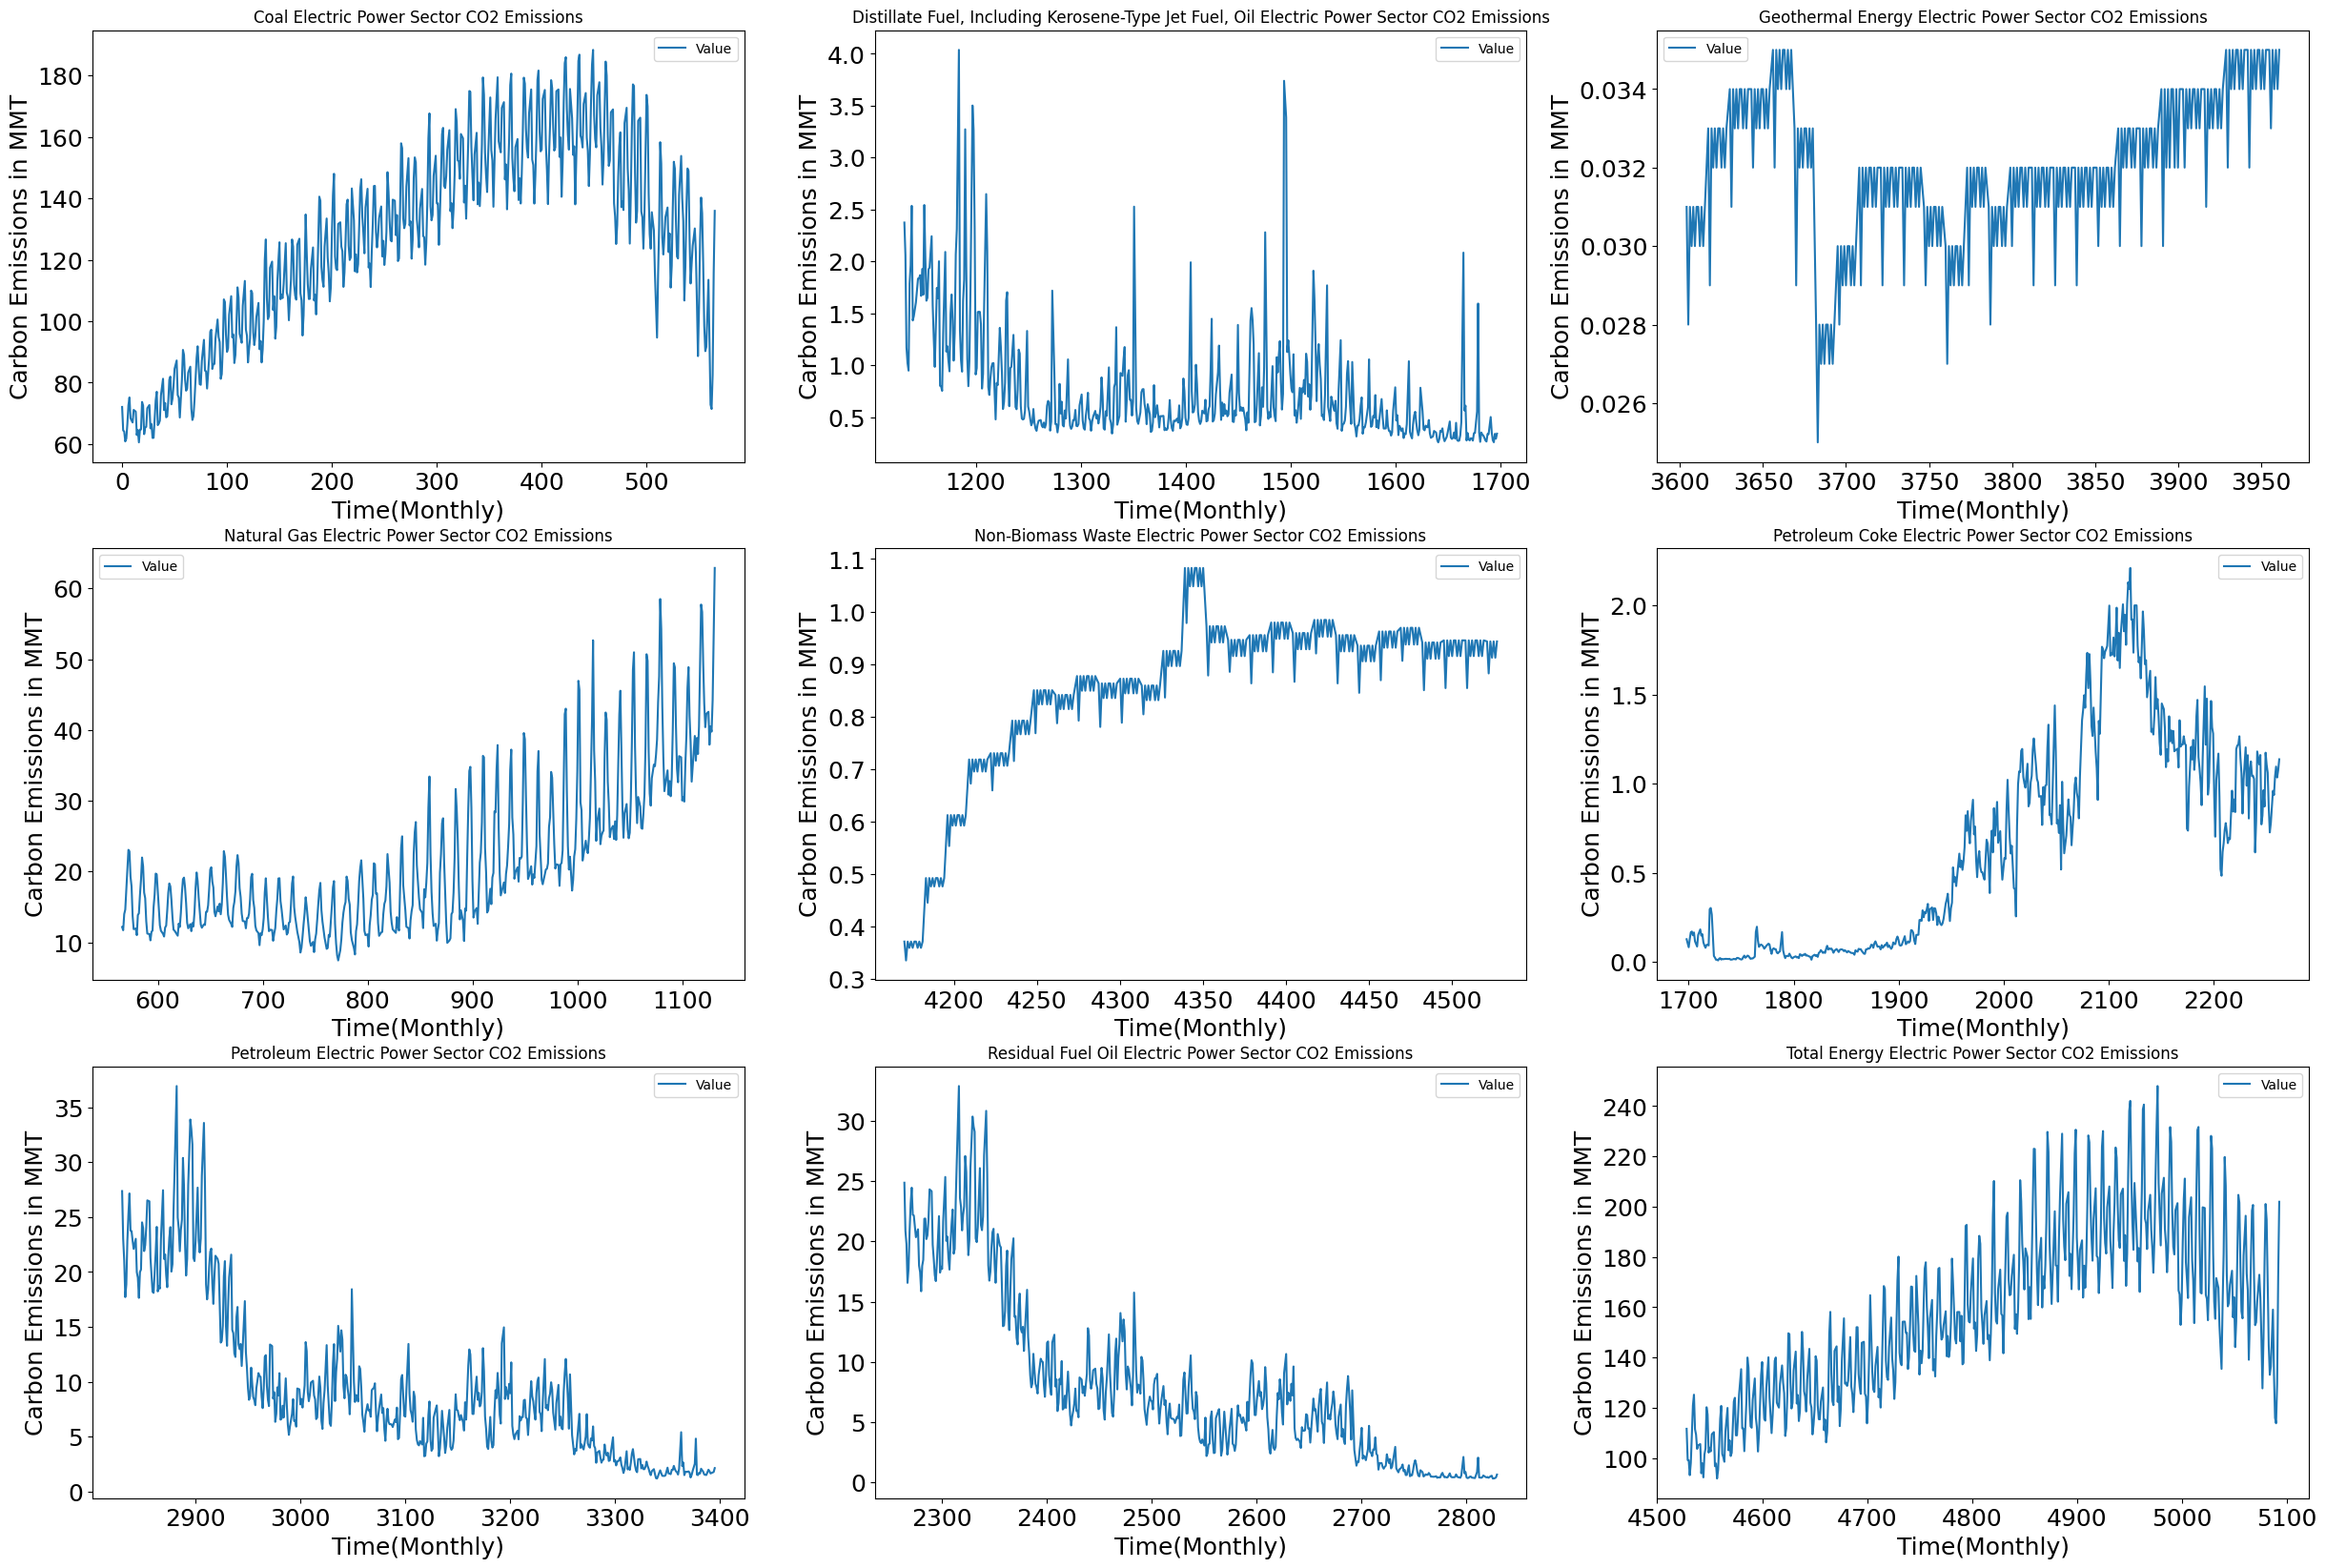

In [19]:
fig, axes = plt.subplots(3,3, figsize = (30, 20))
for (desc, group), ax in zip(Energy_sources, axes.flatten()):
    group.plot(y='Value',ax = ax, title=desc, fontsize = 18)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)